# HW 3 Problem 4 #

4) If we did a similar experiment, combining some NO with the ring-opened radical in an inert  atmosphere  at  1000  K,  the  ratio  of   acyclic nitroso  species  to  ring-closed nitroso species  formed  could  give  an  approximate  experimental  measurement  of  Keq  at  1000  K. This  only  works  if  the  ring  opening/closing  equilibrium  is  established  much faster  than the  radicals  can  react  with  NO. If  you  wanted  to  measure  the  equilibrium,  rather than the ring-closing rate coefficient, at 1000 K, what partial pressure of NO would you use?   



I added the Jetsurf falloff reaction for this one, because it needed pressure dependence for the ring-closing rate to overtake the NO addition rate. 

An initial partial pressure of NO of 10,132.5 Pa and a partial pressure of helium of 81,060 Pa is sufficient for the favored reaction to overtake the NO addition. 


In [114]:
# add appropriate modules
import pandas as pd
import numpy as np
import time
import cantera as ct
from matplotlib import pyplot as plt
import csv
import math
from operator import add

from IPython.display import Image

In [115]:
# get chemkin file and setup reactor
cti_file = '/Users/blais.ch/_01_code/MIT_Kinetics_HW/assignments/HW3/P3/Thermo.cti'
gas = ct.Solution(cti_file)

# Reactor conditions
reactorTemperature = 1000  # Kelvin
reactorPressure = ct.one_atm
concentrations = {'C6H11': 0.1, 'NO': 0.1, 'He': 0.8}

gas.TPX = reactorTemperature, reactorPressure, concentrations 

#initialize reactor, reactor network and sensitivities
atol = 1e-23
rtol = 1e-10
r1 = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r1])
sim.atol = atol
sim.rtol = rtol
print(gas.n_reactions)

2


In [116]:
# Run the reactor
# Create output files for sim that we can read in later:
outfile = open('results','w')
gas_production_label = [s + ' production rate' for s in gas.species_names]
gas_concentration_label = [s + ' concentration' for s in gas.species_names]
writer = csv.writer(outfile)
writer.writerow(['Time (s)'] + gas.species_names + gas_concentration_label + gas_production_label)


time = 0
while sim.time < 10:
    time += 1.e-5
    sim.advance(time)
    writer.writerow([sim.time] + list(gas.X) + list(gas.concentrations)+list(gas.net_production_rates))

In [113]:
# generate data frames
data = pd.read_csv('results')
df = pd.DataFrame(data)

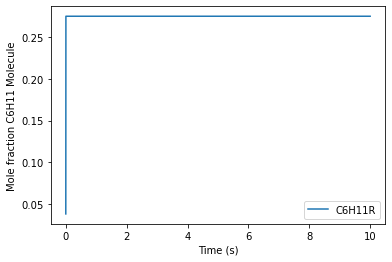

In [111]:
plt1 = data.plot(x='Time (s)', y={'C6H11R'})
plt.ylabel('Mole fraction C6H11 Molecule')
plt.xlabel('Time (s)')
plt.show()

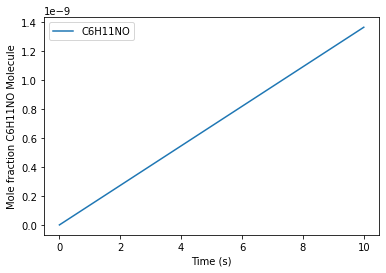

In [112]:
plt1 = data.plot(x='Time (s)', y='C6H11NO')
plt.ylabel('Mole fraction C6H11NO Molecule')
plt.xlabel('Time (s)')
plt.show()